In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import MinMaxScaler
print(tf.__version__)

2.17.1


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
dataset_path = '/content/drive/MyDrive/animal_data'
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128)
)


Found 1944 files belonging to 15 classes.


In [3]:
for images, labels in dataset.take(0):
    print("Image shape:", images.shape)
    print("Labels shape:", labels.shape)


In [5]:
train_images, train_labels = [], []
test_images, test_labels = [], []

In [6]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [15]:
for images, labels in dataset.take(1):
  images.shape

In [16]:
len(labels.shape)

2

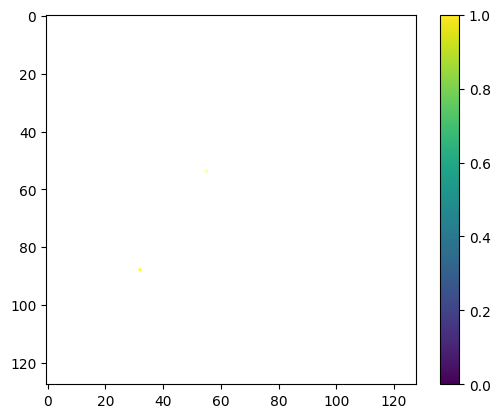

In [17]:
plt.figure()
plt.imshow(images[0]) # Assuming you want to display the first image
plt.colorbar()
plt.grid(False)
plt.show()
plt.show()

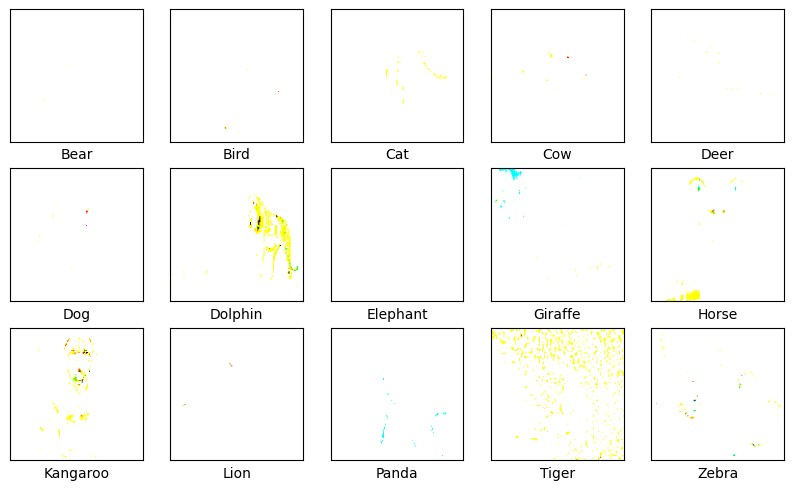

In [18]:
class_name=['Bear','Bird','Cat','Cow','Deer','Dog','Dolphin','Elephant','Giraffe','Horse','Kangaroo','Lion','Panda','Tiger','Zebra']
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[i])
    if i <len(class_name):
      plt.xlabel(class_name[i])

plt.show()

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(15,activation='softmax')])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=15)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=15)


In [28]:
train_images = []
train_labels = []
for images, labels in dataset:
  train_images.extend(images.numpy())
  train_labels.extend(labels.numpy())
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [29]:
 model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(train_images, train_labels,epochs=10)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.0648 - loss: 56.7655
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.0690 - loss: 2.7079
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.0741 - loss: 2.7077
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.0668 - loss: 2.7095
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.0736 - loss: 2.7081
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.0756 - loss: 2.7073
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.0723 - loss: 2.7109
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.0776 - loss: 2.7078
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.0821 - loss: 2.7063
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.0655 - loss: 2.7091


In [33]:
predictions =[0]

In [44]:
test_loss, test_acc = model.evaluate(images, labels, verbose=2)

print('\nTest accuracy:', test_acc)

1/1 - 0s - 466ms/step - accuracy: 0.0833 - loss: 2.7062

Test accuracy: 0.0833333358168602


In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  true_label_index = np.argmax(true_label)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label_index:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label_index]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(len(predictions_array)))
  plt.yticks([])
  thisplot = plt.bar(range(len(predictions_array)), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  true_label_index = np.argmax(true_label)
  thisplot[true_label_index].set_color('blue')


In [43]:
predictions = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
